# Statistics

In [1]:
from functions.statistics import *
from utilities import *

In [2]:
initial_path = '../data/CreateStudy'
s_json_files = get_json_paths(initial_path, 'S')

In [3]:
result = extract_fields_from_json_files(s_json_files, ['optimal_GMAC_NDH', 'optimal_GMAC_DH', 'min_max_std_GMAC_NDH', 'min_max_std_GMAC_DH', 'ARAT_score', 'FMA-UE_score', 'participant_id', 'dominant_arm_affected'])

In [4]:
PATIENT_ID = result['participant_id']
ARAT = result['ARAT_score']
FMA_UE = result['FMA-UE_score']

optimal_thresholds = result['optimal_GMAC_NDH']
COUNT_THRESHOLD = optimal_thresholds[:,0]
PITCH_THRESHOLD = optimal_thresholds[:,1]

min_max_std_optimal_thresholds_GMAC_NDH = result['min_max_std_GMAC_NDH']
STD_COUNT_NDH, STD_PITCH_NDH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH) 

DOMINANT_IMPAIRED = result["dominant_arm_affected"]

### impaired arm

Linear model coefficients: [-0.04263987]
Linear model intercept: 3.656762629005975
Pearson Correlation: -0.32879465788650597
Spearman Correlation: -0.5443450530086585


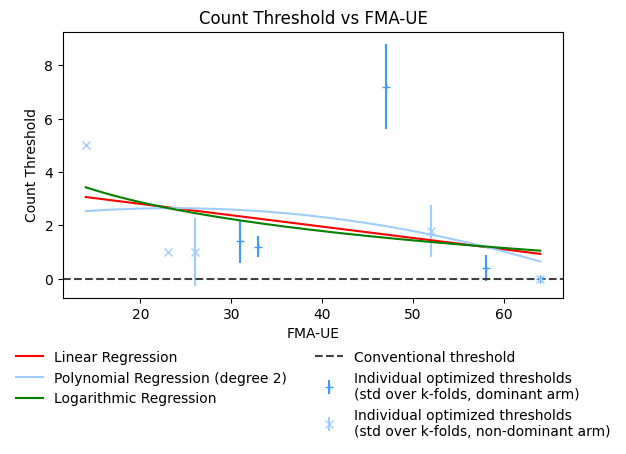

Linear model coefficients: [0.0359044]
Linear model intercept: 41.14073872895165
Pearson Correlation: 0.06777130974339089
Spearman Correlation: 0.1580554413568168


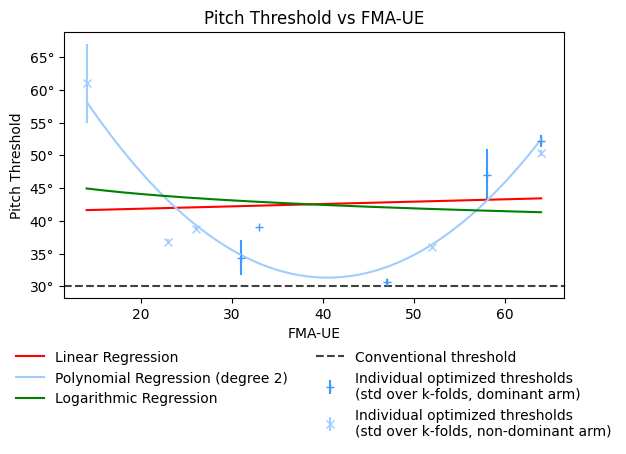

Linear model coefficients: [-0.02640151]
Linear model intercept: 2.628681638950798
Pearson Correlation: -0.2562369315521449
Spearman Correlation: -0.5168219885306926


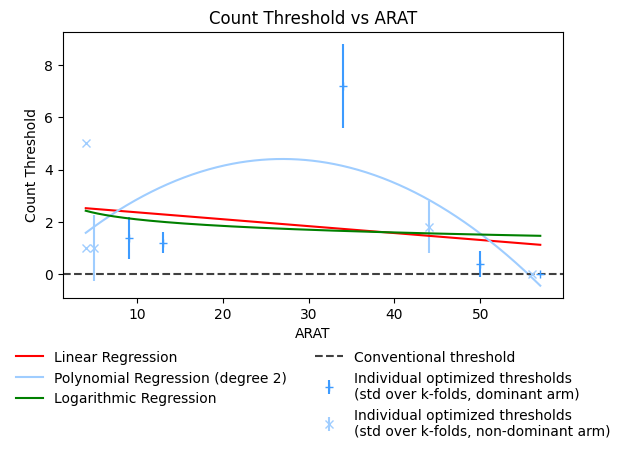

Linear model coefficients: [0.08805075]
Linear model intercept: 40.18979941710955
Pearson Correlation: 0.20918731356552486
Spearman Correlation: 0.20060882941442132


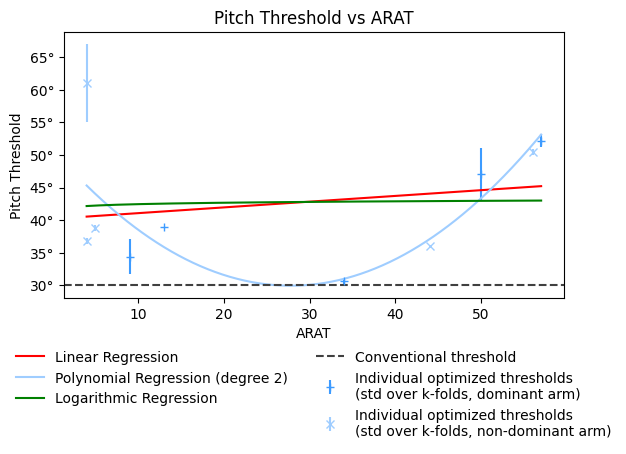

In [5]:
check_regression(FMA_UE, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(FMA_UE, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)

### healthy arm

In [6]:
optimal_thresholds = result['optimal_GMAC_DH']
COUNT_THRESHOLD_HEALTHY = optimal_thresholds[:,0]
PITCH_THRESHOLD_HEALTHY = optimal_thresholds[:,1]

min_max_std_optimal_thresholds_GMAC_DH = result['min_max_std_GMAC_DH']
STD_COUNT_DH, STD_PITCH_DH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH) 

Linear model coefficients: [-0.13124661]
Linear model intercept: 10.90736013036393
Pearson Correlation: -0.4458796093391199
Spearman Correlation: -0.5477156428203347


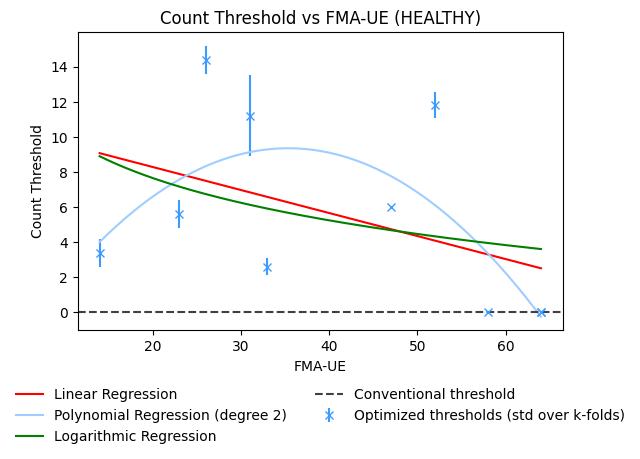

Linear model coefficients: [-0.10840576]
Linear model intercept: 60.326317218902766
Pearson Correlation: -0.2817436643389887
Spearman Correlation: -0.10942299786241164


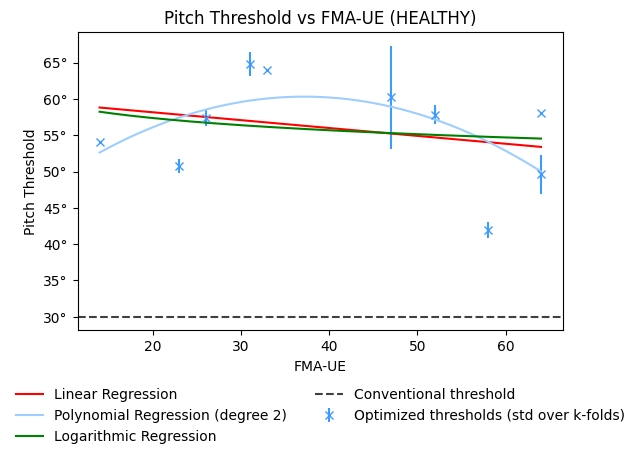

Linear model coefficients: [-0.11833533]
Linear model intercept: 8.766055203154465
Pearson Correlation: -0.5059971473409981
Spearman Correlation: -0.5538697511666306


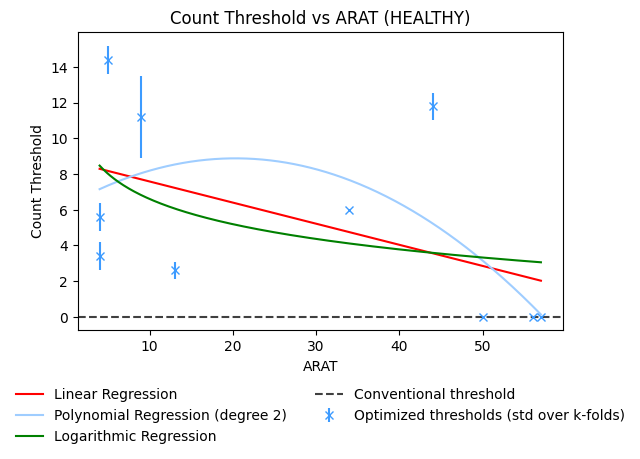

Linear model coefficients: [-0.11374079]
Linear model intercept: 58.99924567118121
Pearson Correlation: -0.37206783517103625
Spearman Correlation: -0.13373921960961418


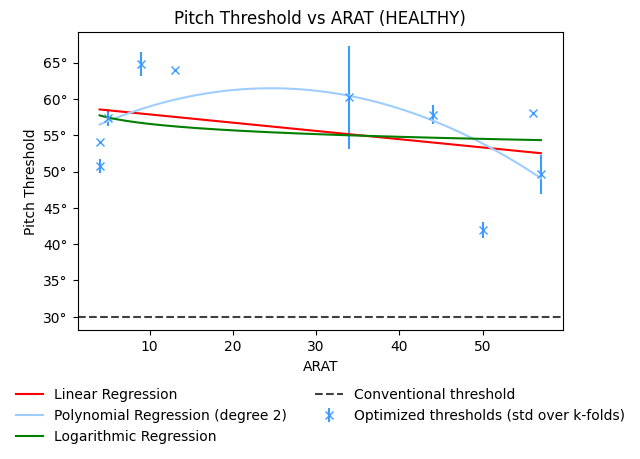

In [7]:
check_regression(FMA_UE, COUNT_THRESHOLD_HEALTHY, STD_COUNT_DH, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE (HEALTHY)')
check_regression(FMA_UE, PITCH_THRESHOLD_HEALTHY, STD_PITCH_DH, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE (HEALTHY)')
check_regression(ARAT, COUNT_THRESHOLD_HEALTHY, STD_COUNT_DH, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT (HEALTHY)')
check_regression(ARAT, PITCH_THRESHOLD_HEALTHY, STD_PITCH_DH, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT (HEALTHY)')

In [8]:
#plot_spearman_correlation(stroke_arat_score, optimal_AC_NDH_array, "Scatter Plot with Spearman Correlation and Linear Fit for Optimal AC (Aff. H)", None)

## Check distribution of individual optimal thresholds

Mean count threshold (affected): 1.9000000000000004, Mean count threshold (healthy): 5.499999999999999
Mean elevation threshold (affected): 42.62, Mean elevation threshold (healthy): 55.86


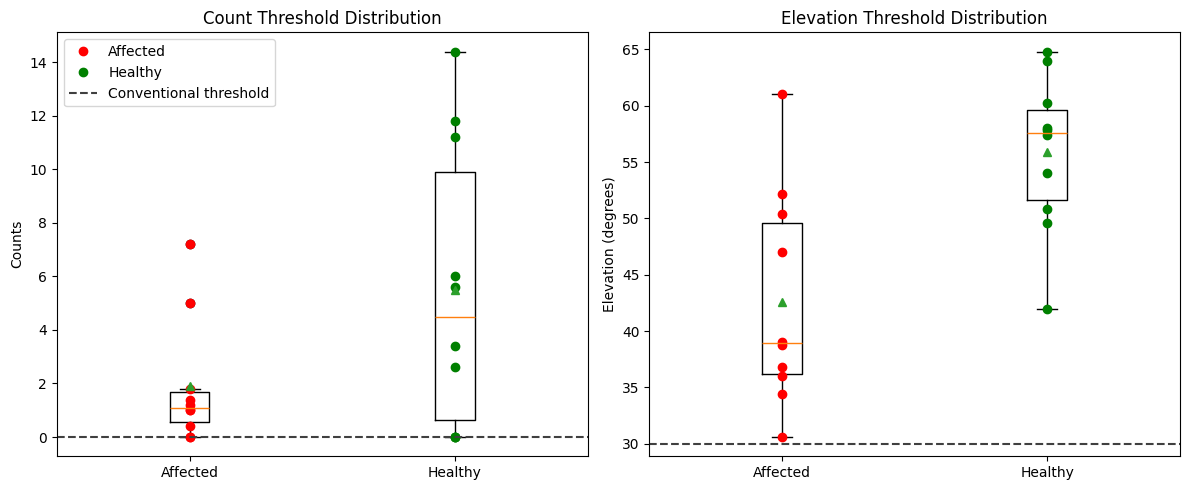

In [9]:
check_distribution(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY)